# Exercise: RDataFrame and collections

The same dataset used in the previous exercise (`TTree` "dataset" in file `../data/example_file.root`) contains two vector columns `vec1` and `vec2`.<br>
The elements of `vec1` are distributed as a mixture of Gaussians, plus background noise.<br>
To remove the background noise, select the elements of `vec1` for which the square of the corresponding elements in `vec2` is less than 0.1.

Where are the peaks of this mixture of Gaussians?

### Useful links

- [RDataFrame: working with collections](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#collections)
- [RVec reference](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html)

In [1]:
import ROOT

Welcome to JupyROOT 6.30/07


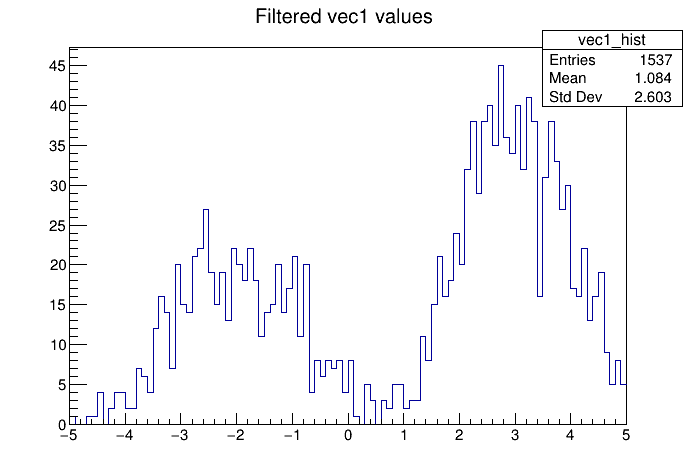

In [4]:
# Load the ROOT file and TTree
df = ROOT.RDataFrame("dataset", "../../data/example_file.root")

# Define a filtered version of vec1 where corresponding vec2^2 < 0.1
df_filtered = df.Define(
    "filtered_vec1",
    "ROOT::VecOps::RVec<float> out; "
    "for (size_t i = 0; i < vec1.size(); ++i) "
    "if (vec2[i]*vec2[i] < 0.1) out.push_back(vec1[i]); "
    "return out;"
)

# Create histogram from the filtered values
hist = df_filtered.Histo1D(("vec1_hist", "Filtered vec1 values", 100, -5, 5), "filtered_vec1")

# Draw
c = ROOT.TCanvas()
hist.Draw()
c.Draw()